<h1>Importing Libraries</h1>

In [101]:
# Importing Required Libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

<h1>Dataset Path</h1>

In [76]:
# Path for dataset
path=r'C:\Users\Doctor Computers\Desktop\Machine Learning 1\Week 3\Day 3\Housing.csv'

<h1>Loading Dataset</h1>

In [77]:
# Loading Dataset
df=pd.read_csv(path)
print("Dataset:\n",df.head(10))

Dataset:
       price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000   7420         4          2        3      yes        no       no   
1  12250000   8960         4          4        4      yes        no       no   
2  12250000   9960         3          2        2      yes        no      yes   
3  12215000   7500         4          2        2      yes        no      yes   
4  11410000   7420         4          1        2      yes       yes      yes   
5  10850000   7500         3          3        1      yes        no      yes   
6  10150000   8580         4          3        4      yes        no       no   
7  10150000  16200         5          3        2      yes        no       no   
8   9870000   8100         4          1        2      yes       yes      yes   
9   9800000   5750         3          2        4      yes       yes       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes     

<h1>Histogram for numeric features</h1>

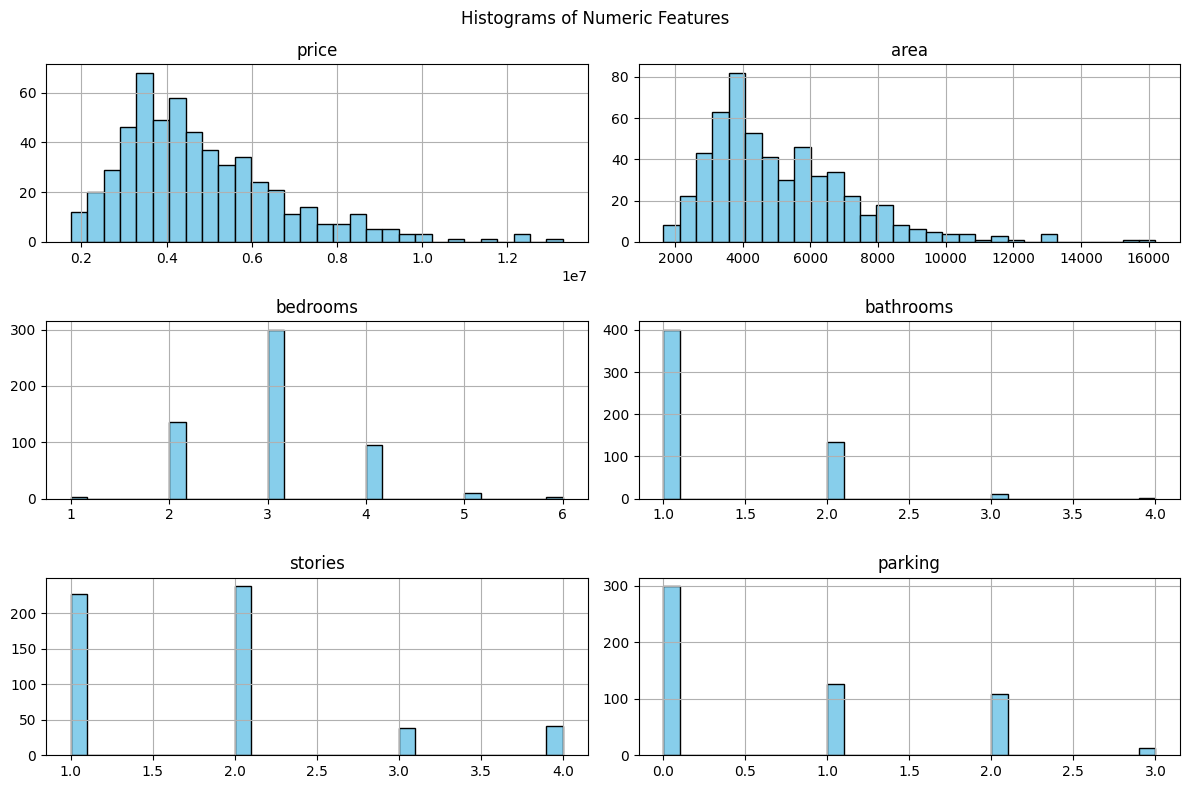

In [78]:
# Histogram for numeric features
df.hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()

<h1>Box Plot for detectiing outliers</h1>

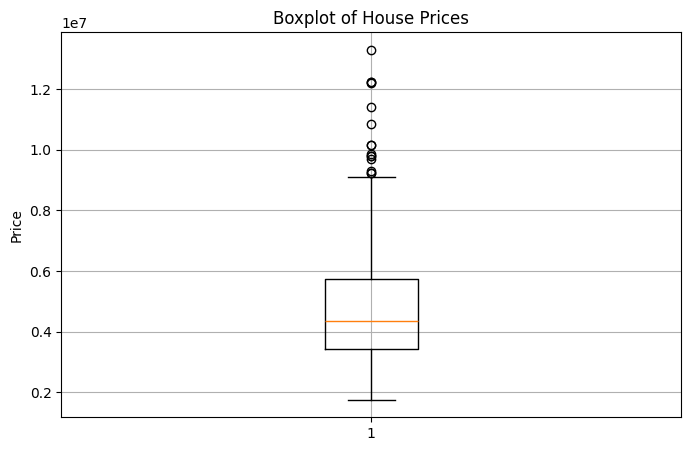

In [79]:
# Box Plot fordetection for detectiong  outliers
plt.figure(figsize=(8, 5))
plt.boxplot(df['price'])
plt.title('Boxplot of House Prices')
plt.ylabel('Price')
plt.grid(True)
plt.show()

<h1>Data Preprocessing</h1>

In [80]:
# Show total missing values per column
print(df.isnull().sum())
print(df[df.isnull().any(axis=1)])

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
Empty DataFrame
Columns: [price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]
Index: []


In [81]:
# Remove rows with any missing values
df = df.dropna()
df = df.fillna(df.mean(numeric_only=True))

In [82]:
# Duplicate rows
print(df[df.duplicated()])
df = df.drop_duplicates()

Empty DataFrame
Columns: [price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]
Index: []


In [83]:
#Reset indexing after cleaning
df = df.reset_index(drop=True)

In [84]:
print("Preprocessed Dataset : \n",df.head(10))

Preprocessed Dataset : 
       price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000   7420         4          2        3      yes        no       no   
1  12250000   8960         4          4        4      yes        no       no   
2  12250000   9960         3          2        2      yes        no      yes   
3  12215000   7500         4          2        2      yes        no      yes   
4  11410000   7420         4          1        2      yes       yes      yes   
5  10850000   7500         3          3        1      yes        no      yes   
6  10150000   8580         4          3        4      yes        no       no   
7  10150000  16200         5          3        2      yes        no       no   
8   9870000   8100         4          1        2      yes       yes      yes   
9   9800000   5750         3          2        4      yes       yes       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no      

In [85]:
# Coulmns in dataset
col=df.columns
print("Columns : ",col)

Columns :  Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [86]:
# number of Rows and Columns
rows,cols=df.shape
print("Rows : ",rows)
print("Columns : ",cols)

Rows :  545
Columns :  13


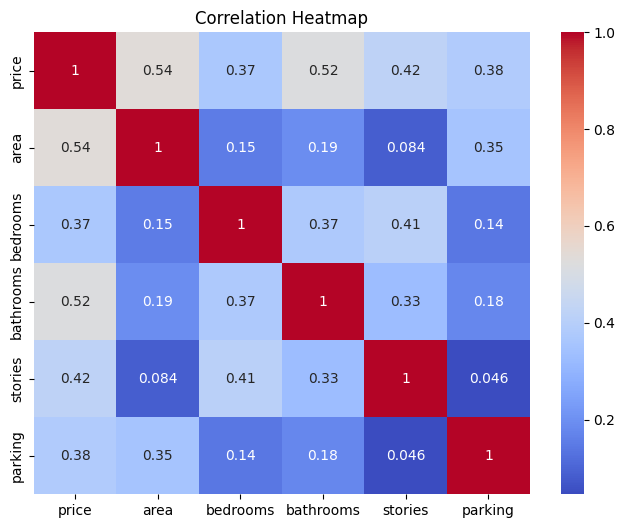

In [87]:
df_numeric = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [88]:
# Splitting data into X & Y
X=df.drop("price",axis=1)
Y=df['price']

print("X:\n",X)
print("Y:\n",Y)

X:
      area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished

In [89]:
# preprocessing Data
X=OneHotEncoder().fit_transform(X).toarray()
Y=LabelEncoder().fit_transform(Y)
print("X:\n",X)
print("Y:\n",Y)

X:
 [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Y:
 [218 217 217 216 215 214 213 213 212 211 211 210 209 208 208 207 207 206
 205 204 203 202 201 201 200 199 198 197 197 197 197 197 196 195 194 193
 192 191 190 189 188 187 186 186 185 185 184 183 182 181 181 181 180 180
 180 180 179 178 177 177 176 175 175 174 173 172 172 171 170 169 169 168
 167 166 165 165 165 165 165 165 164 163 163 162 161 161 161 160 160 159
 159 158 157 156 156 156 156 156 155 154 153 153 152 152 152 151 151 150
 149 148 148 148 147 147 146 146 146 145 145 145 145 145 145 145 145 144
 143 143 142 142 141 140 140 140 139 138 137 137 137 137 137 136 135 135
 135 135 135 135 135 135 135 134 134 133 133 133 132 131 131 130 130 130
 130 129 128 127 126 125 124 124 124 124 124 124 124 124 124 123 122 121
 121 121 120 120 119 119 119 119 118 117 117 117 117 116 115 114 114 113
 112 111 110 110 110 110 110 110 

<h1>Spliting dataset for Training & Testing</h1>

In [90]:
# Splitting data for Training and Testing
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.3)

<h1>Linear Regression Model</h1>

In [91]:
# Loading Linear Regression Model
model = LinearRegression()

In [92]:
# Training Model
model.fit(X_Train,Y_Train)

LinearRegression()

In [93]:
# Making Prediction for Testing
Y_Predict=model.predict(X_Test)

<h1>Model Evaluation</h1>

In [94]:
# Evaluationg Model
mse = mean_squared_error(Y_Test, Y_Predict)   
r2 = r2_score(Y_Test, Y_Predict)

print("Mean Squared Error : ",mse)
print("R2 Square Error : ",r2)

Mean Squared Error :  1367.6662513784179
R2 Square Error :  0.6144720660295546


<h1> Intercept & Coefficients of model</h1>

In [95]:
# Intercept and Coefficients
Intercept = model.intercept_
Coefficients = model.coef_
print(f"Intercept: {Intercept}")
print("Coefficients:")
for i, coef in enumerate(Coefficients):
    print(f"  Feature {i}: {coef}")

Intercept: 138.9922481453084
Coefficients:
  Feature 0: -4.91450457859334
  Feature 1: -54.692484353743126
  Feature 2: 9.237055564881302e-14
  Feature 3: 26.870966662388504
  Feature 4: -53.7252130006215
  Feature 5: 1.092459456231154e-13
  Feature 6: -51.48729616070791
  Feature 7: 3.7104800953991077
  Feature 8: -61.89131081244419
  Feature 9: -31.221003321311393
  Feature 10: 16.403119259185146
  Feature 11: 5.3290705182007514e-14
  Feature 12: -96.28010634314415
  Feature 13: 28.172153099526327
  Feature 14: -69.47838056081446
  Feature 15: -51.9522860375811
  Feature 16: -1.3855583347321954e-13
  Feature 17: 8.171241461241152e-14
  Feature 18: 6.980401269394655
  Feature 19: -39.98191253968986
  Feature 20: 11.113680675392379
  Feature 21: -48.18079741798966
  Feature 22: -20.641569002878697
  Feature 23: 7.105427357601002e-15
  Feature 24: -35.20452420120655
  Feature 25: 0.293732471273195
  Feature 26: 9.026210837160106
  Feature 27: -55.502410977548394
  Feature 28: -37.076725

<h1>OLS</h1>

In [96]:
# Implementin OLS
X_ols = sm.add_constant(X)
ols_model = sm.OLS(Y, X_ols).fit()
print("OLS Summary:")
print(ols_model.summary())

OLS Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     5.754
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           8.46e-40
Time:                        17:11:09   Log-Likelihood:                -2392.8
No. Observations:                 545   AIC:                             5396.
Df Residuals:                     240   BIC:                             6707.
Df Model:                         304                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5052      1.977     14

<h1>Scatter Plot Between Actual and Predicted Proces</h1>

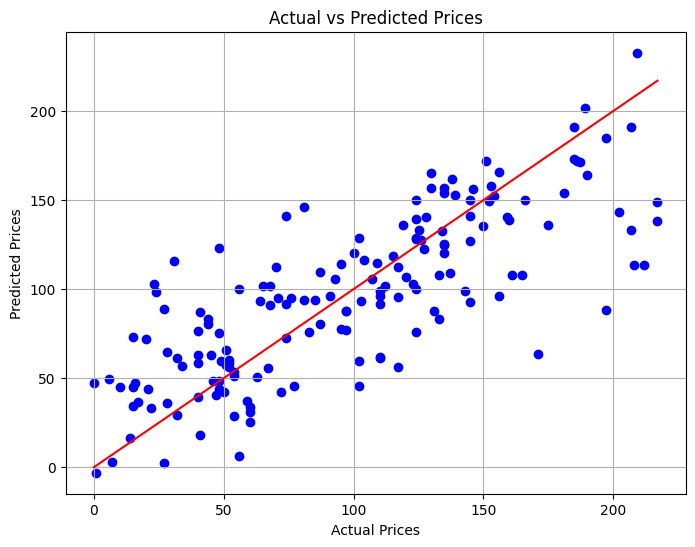

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_Test, Y_Predict, color='blue')
plt.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], color='red', linestyle='-')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

<h1>Scatter Plot between Residuals and Predicted Prices</h1>

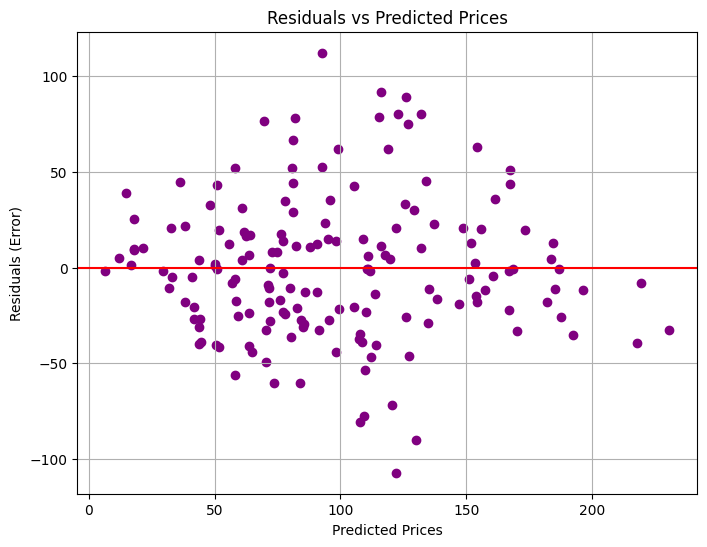

In [98]:
residuals = Y_Test - Y_Predict

plt.figure(figsize=(8, 6))
plt.scatter(Y_Predict, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='-')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Error)')
plt.title('Residuals vs Predicted Prices')
plt.grid(True)
plt.show()

<h1>Saving Model</h1>

In [102]:
joblib.dump(model, r'C:\Users\Doctor Computers\Desktop\Machine Learning 1\Week 3\Day 3\Linear_Model.pkl')
print(">>>Model is saved successfully<<<")

>>>Model is saved successfully<<<


<h1>Load Saved Model</h1>

In [105]:
#Loaded_Model = joblib.load(r'C:\Users\Doctor Computers\Desktop\Machine Learning 1\Week 3\Day 3\Linear_Model.pkl')